In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from WindPy import w
%matplotlib inline

In [55]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

## 获取起始日期

In [56]:
today = datetime.datetime.today()

In [57]:
today.strftime('%Y-%m-%d')

'2019-03-25'

In [58]:
start_date = today - datetime.timedelta(365) # 最近1年

In [59]:
start_date.strftime('%Y-%m-%d')

'2018-03-25'

## 获取数据

In [60]:
df = pd.read_excel(u'../data/资产与宏观变量.xlsx')

In [61]:
df

,Variables,Name,Assets
0,USDCNH.FX,美元兑人民币,000300.SH
1,S0059749,10Y国债收益率,000905.SH
2,M0017142,3M SHIBOR,881001.WI
3,S0059766,AA级企业债收益率,CBA00602.CS
4,G1122652,股票波动率,CBA02002.CS
5,SPX.GI,标普500,AU9999.SGE
6,G0000891,10Y美债收益率,HSI.HI
7,G8324466,A股市盈率,NaN


In [62]:
var2name = {k: v for k, v in zip(df['Variables'], df['Name'])}

In [63]:
data = w.wsd(df['Assets'].tolist()[:7], 'close', start_date, today)

In [64]:
price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [65]:
price.head()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2018-03-26,3879.8930,5902.9588,4277.7449,113.9653,77.9756,274.18,30548.77
2018-03-27,3913.2689,6034.7750,4347.2306,113.8804,77.9624,274.10,30790.83
2018-03-28,3842.7155,5973.3414,4293.6877,113.8727,77.9955,272.52,30022.53
2018-03-29,3894.0498,6034.8572,4341.3845,113.8365,78.0101,269.90,30093.38
2018-03-30,3898.4977,6114.7382,4376.2499,113.8353,78.0015,270.56,30093.38


In [66]:
price.tail()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2019-03-19,3833.9626,5522.1801,4221.8907,118.3324,79.7530,285.20,29466.28
2019-03-20,3835.4397,5515.7856,4221.3026,118.2893,79.7427,284.59,29320.97
2019-03-21,3836.8913,5589.4780,4246.9516,118.3613,79.7518,286.50,29071.56
2019-03-22,3833.8013,5622.1402,4254.6575,118.5079,79.7608,286.50,29113.36
2019-03-25,3833.8013,5622.1402,4254.6575,118.5079,79.7608,286.50,29113.36


In [67]:
market_variables = [x for x in df['Variables'] if str(x).find('.') != -1]
economic_variables = [x for x in df['Variables'] if str(x).find('.') == -1 and str(x) != 'nan']

In [68]:
market_variables

[u'USDCNH.FX', u'SPX.GI']

In [69]:
economic_variables

[u'S0059749', u'M0017142', u'S0059766', u'G1122652', u'G0000891', u'G8324466']

In [70]:
data = w.wsd(market_variables, 'close', start_date, today)

In [71]:
market_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in market_variables])

In [72]:
market_df.tail()

,美元兑人民币,标普500
2019-03-19,6.7177,2832.57
2019-03-20,6.6886,2824.23
2019-03-21,6.7073,2854.88
2019-03-22,6.7236,2800.71
2019-03-25,6.7236,2800.71


In [73]:
market_nav = (1+market_df.pct_change()).cumprod()

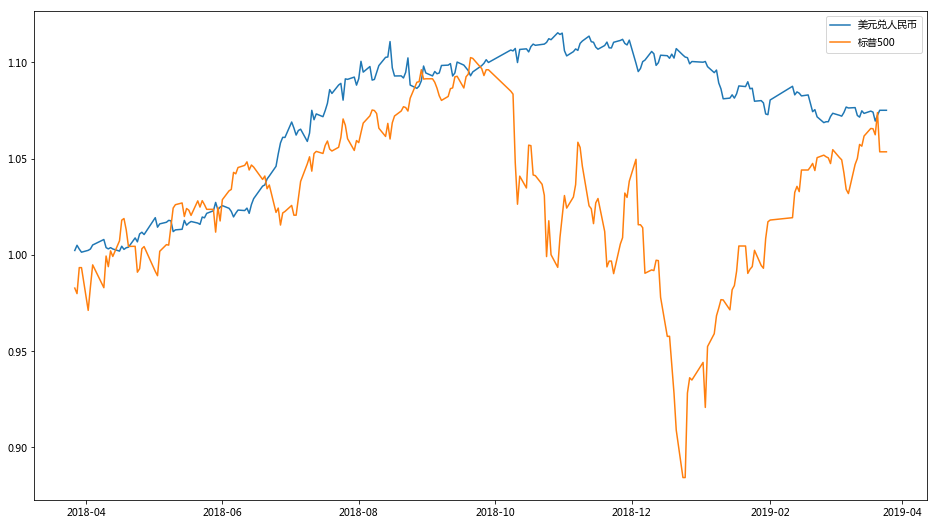

In [74]:
market_nav.plot(figsize=(16, 9))

In [75]:
data = w.edb(economic_variables, start_date, today)

In [76]:
economic_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in economic_variables])

In [77]:
economic_df.head()

,10Y国债收益率,3M SHIBOR,AA级企业债收益率,股票波动率,10Y美债收益率,A股市盈率
2018-03-26,3.7307,4.6351,5.8989,27.83,2.85,17.58
2018-03-27,3.7432,4.6239,5.9033,28.70,2.78,17.76
2018-03-28,3.7406,4.6174,5.8971,30.39,2.77,17.51
2018-03-29,3.7456,4.5247,5.8960,26.85,2.74,17.72
2018-03-30,3.7407,4.4615,5.8957,NaN,NaN,17.77


In [78]:
economic_df[u'信用利差'] = economic_df[u'AA级企业债收益率'] - economic_df[u'10Y国债收益率']

In [79]:
del economic_df[u'AA级企业债收益率']

In [80]:
economic_nav = (1 + economic_df.pct_change()).cumprod().fillna(method='ffill')

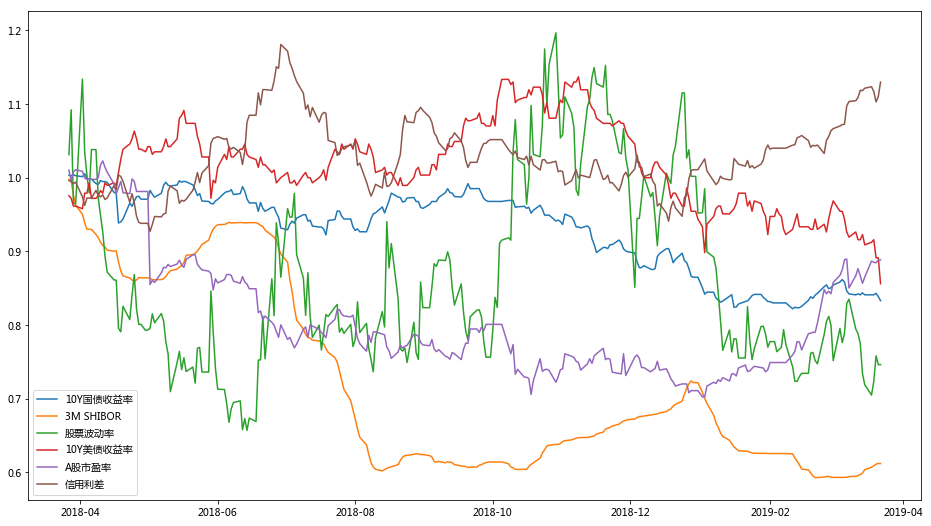

In [81]:
economic_nav.plot(figsize=(16, 9))

In [82]:
variable_df = market_nav.join(economic_nav)

In [83]:
variable_df.iloc[0] = 1

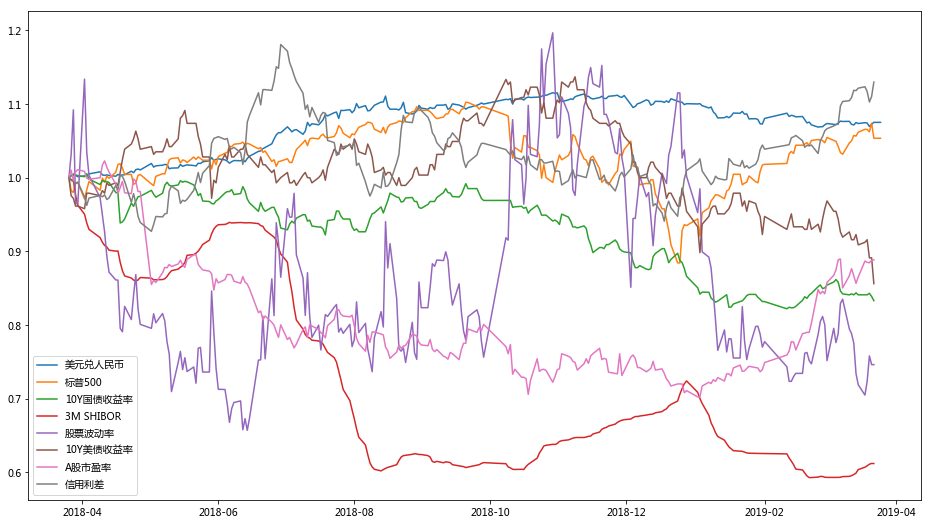

In [84]:
variable_df.plot(figsize=(16, 9))

In [85]:
variable_df.to_excel('../data/variables.xlsx')

## 初始化表格

In [86]:
ret_df = pd.DataFrame()

In [87]:
ret_df[u'成长股'] = price['000905.SH'].pct_change()
ret_df[u'价值股'] = price['000300.SH'].pct_change()
ret_df[u'港股'] = price['HSI.HI'].pct_change()
ret_df[u'黄金'] = price['AU9999.SGE'].pct_change()
ret_df[u'国债'] = price['CBA00602.CS'].pct_change()
ret_df[u'信用债'] = price['CBA02002.CS'].pct_change()

In [88]:
nav = (1 + ret_df).cumprod()

In [89]:
nav.iloc[0] = 1

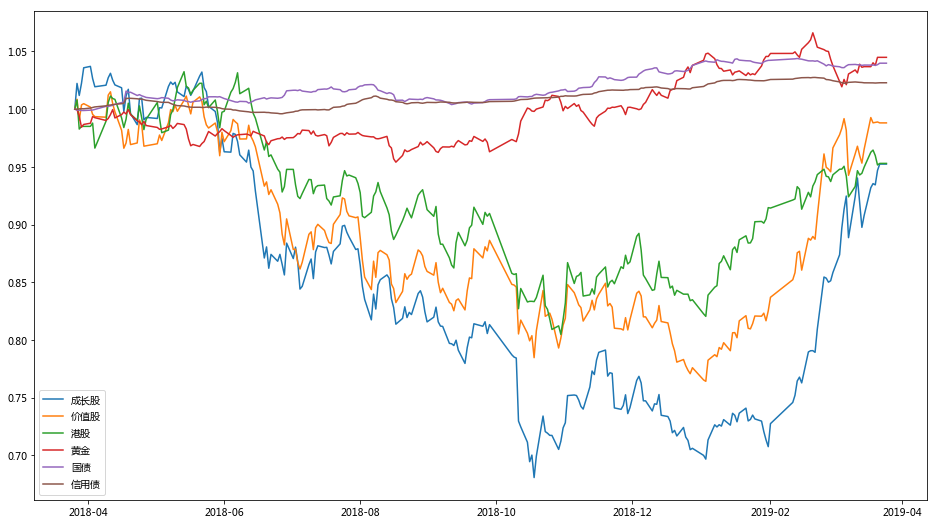

In [90]:
nav.plot(figsize=(16, 9))

In [91]:
nav.to_excel(u'../data/nav.xlsx')

## 生成EWMA相关性矩阵

In [92]:
cor_df = pd.DataFrame(index= ret_df.columns, 
                      columns=market_df.columns.tolist() + economic_df.columns.tolist())

In [93]:
for asset in cor_df.index:
    for var in cor_df.columns:
        if var in market_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+market_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]
        elif var in economic_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+economic_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]

In [94]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.677105,0.645563,-0.078711,-0.150676,-0.488593,-0.42806,0.966821,0.780452
价值股,-0.708269,0.696414,-0.211231,-0.31336,-0.562334,-0.484768,0.986942,0.8047
港股,-0.861075,0.670278,-0.321771,-0.234485,-0.797947,-0.573312,0.862015,0.74001
黄金,-0.353781,-0.125654,-0.898754,-0.402927,-0.449301,-0.75742,0.183302,0.243123
国债,-0.276872,-0.224771,-0.985964,-0.375276,-0.458262,-0.777199,0.105701,0.19685
信用债,-0.260827,-0.0912843,-0.947922,-0.56913,-0.467633,-0.710152,0.1477,0.188881


In [95]:
cor_df.to_excel(u'../data/ewma_cor.xlsx')

In [96]:
# cor_df[cor_df.abs() < 0.1] = 0

In [97]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.677105,0.645563,-0.078711,-0.150676,-0.488593,-0.42806,0.966821,0.780452
价值股,-0.708269,0.696414,-0.211231,-0.31336,-0.562334,-0.484768,0.986942,0.8047
港股,-0.861075,0.670278,-0.321771,-0.234485,-0.797947,-0.573312,0.862015,0.74001
黄金,-0.353781,-0.125654,-0.898754,-0.402927,-0.449301,-0.75742,0.183302,0.243123
国债,-0.276872,-0.224771,-0.985964,-0.375276,-0.458262,-0.777199,0.105701,0.19685
信用债,-0.260827,-0.0912843,-0.947922,-0.56913,-0.467633,-0.710152,0.1477,0.188881


## 计算变量的trend

In [98]:
trend = {}
for var in cor_df.columns:
    if var in market_df.columns:
        t = market_df[var]
    elif var in economic_df.columns:
        t = economic_df[var]
    ret = t.pct_change()[-60:]
    up, down = ret[ret > 0].sum(), -ret[ret < 0].sum()
    if up > down:
        trend[var] = up / down
    else:
        trend[var] = -down / up

In [99]:
for k, v in trend.iteritems():
    print k, v

标普500 1.8294551665496035
股票波动率 -1.32978660941436
3M SHIBOR -5.7547734837085125
美元兑人民币 -1.4668435871058212
信用利差 1.9958204718807069
10Y国债收益率 -1.3625374385805653
A股市盈率 2.5858524889862635
10Y美债收益率 -1.3276479565980859


# 综合得到Score Board

In [100]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [101]:
board = pd.DataFrame(index=cor_df.index, columns=cor_df.columns)
for var in cor_df.columns:
    x = cor_df[var] * trend[var]
    board[var] = sigmoid(x.astype(np.float32))

In [102]:
trend_df = pd.DataFrame(trend, index=[u'变量趋势'])

In [103]:
board = trend_df.append(board)

In [104]:
board = board[cor_df.columns]

In [105]:
board

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
变量趋势,-1.466844,1.829455,-1.362537,-5.754773,-1.329787,-1.327648,2.585852,1.995820
成长股,0.729721,0.765133,0.526786,0.704143,0.656949,0.638374,0.924146,0.826015
价值股,0.738642,0.781437,0.571460,0.858552,0.678696,0.655567,0.927714,0.832860
港股,0.779553,0.773160,0.607884,0.794033,0.742900,0.681605,0.902828,0.814108
黄金,0.626900,0.442782,0.772870,0.910418,0.645078,0.732156,0.616328,0.618982
国债,0.600159,0.398622,0.793051,0.896565,0.647802,0.737274,0.567909,0.596975
信用债,0.594498,0.458347,0.784414,0.963569,0.650640,0.719671,0.594339,0.593143


In [106]:
board.to_excel(u'../data/dashboard.xlsx')